In [9]:
import sympy as s
from sympy import tan, sin, cos, lambdify
import matplotlib.pyplot as plt
from sympy.abc import theta, x
import numpy as np

theta_t, theta_i = s.symbols('theta_t, theta_i')

In [2]:
r_s = sin(theta_t - theta_i) / sin(theta_t + theta_i)
r_s

-sin(theta_i - theta_t)/sin(theta_i + theta_t)

In [3]:
t_s = 2*(sin(theta_t)*cos(theta_i)) / sin(theta_t + theta_i)
t_s

2*sin(theta_t)*cos(theta_i)/sin(theta_i + theta_t)

In [4]:
r_p = tan(theta_t - theta_i) / tan(theta_t + theta_i)
r_p

-tan(theta_i - theta_t)/tan(theta_i + theta_t)

In [5]:
t_p = 2 * (sin(theta_t) * cos(theta_i)) / ( sin(theta_t + theta_i) * cos(theta_t - theta_i) )
t_p

2*sin(theta_t)*cos(theta_i)/(sin(theta_i + theta_t)*cos(theta_i - theta_t))

In [6]:
n_i = 1
n_t = 2.42

x_values = np.arange(0, np.pi/2, 1/16)
# y_values = np.array([])
eqs = np.array([r_s,r_p, t_s,t_p])
x_values

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625])

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in true_divide
  return [-sin(theta_i - arcsin(0.413223140495868*sin(theta_i)))/sin(theta_i + arcsin(0.413223140495868*sin(theta_i))), -tan(theta_i - arcsin(0.413223140495868*sin(theta_i)))/tan(theta_i + arcsin(0.413223140495868*sin(theta_i))), 0.826446280991736*sin(theta_i)*cos(theta_i)/sin(theta_i + arcsin(0.413223140495868*sin(theta_i))), 0.826446280991736*sin(theta_i)*cos(theta_i)/(sin(theta_i + arcsin(0.413223140495868*sin(theta_i)))*cos(theta_i - arcsin(0.413223140495868*sin(theta_i))))]


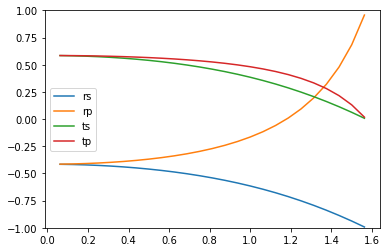

In [7]:

snell_t = s.asin( (n_i/n_t)*sin(theta_i))

eqs = [eq.subs({theta_t: snell_t}) for eq in eqs]
eq_names = ['rs', 'rp', 'ts', 'tp']

f = s.lambdify(theta_i, eqs, 'numpy')
y_values = f(x_values) 

plt.ylim(bottom=-1, top=1)
[plt.plot(x_values, ys, label=eq_names[n]) for n, ys in enumerate(y_values)]
plt.legend()

/tmp/ipykernel_178398/2256419462.py:2: RuntimeWarning: invalid value encountered in true_divide
  rs = np.sin(snell_t - x_values) / np.sin(snell_t + x_values)
/tmp/ipykernel_178398/2256419462.py:3: RuntimeWarning: invalid value encountered in true_divide
  rp = np.tan(snell_t - x_values) / np.tan(snell_t + x_values)


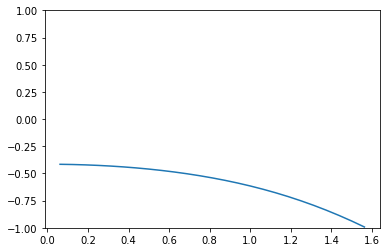

In [8]:
snell_t = np.arcsin( (n_i/n_t)*np.sin(x_values))
rs = np.sin(snell_t - x_values) / np.sin(snell_t + x_values)
rp = np.tan(snell_t - x_values) / np.tan(snell_t + x_values)

plt.ylim(bottom=-1, top=1)
plt.plot(x_values, rs)

P3.7)
Find Brewster's Angle for an air-glass interface with $n_g = 1.5$

In [9]:
nt = 1.5
ni = 1
theta_b = (np.arctan(nt/ni))
np.rad2deg(theta_b)

56.309932474020215

Compute Rs and Rp at this angle

In [10]:
Rs = np.absolute(r_s)**2
Rp = np.absolute(r_p)**2

theta_2 = np.pi/2 - theta_b

Rs.evalf(subs={theta_i: theta_2, theta_t: theta_b})

0.147928994082840

In [11]:
Rp.evalf(subs={theta_i: theta_2, theta_t: theta_b})

6.50937405669209e-34

P3.8) Diamonds have an index of refraction of n = 2.42 which allows total in-
ternal reflection to occur at relatively shallow angles of incidence. Gem
cutters choose facet angles that ensure most of the light entering the
top of the diamond will reflect back out to give the stone its expensive
sparkle.

Part A)
critical angle = ?

In [3]:
n = 2.42
theta_c = np.arcsin(1/n)
np.rad2deg(theta_c)

24.407468917986588

Part B)
What fraction fo the light reflects for internal angles $theta_i = 40.5 $ degrees and $theta_i = 50.6 $ degrees

It should be 0, as both those angles are greater than the critical angle

However, for quarts:

In [4]:
theta_c2 = np.arcsin(1/1.46)
np.rad2deg(theta_c2)

43.23022078925506

Part C)
find phase shift upon reflection for aforementioned angles, 40.5 and 50.6 degrees

In [15]:
# rs = lambda phi_s : np.e**(s.abc.i * phi_s)
from sympy.abc import i, e, phi
rs = e**(-2*i*s.atan( (1 / n*cos(theta_i)) * s.sqrt( n**2 * s.sin(theta_i) - 1) ))
x = lambdify(theta_i, rs)
x(np.deg2rad(40.5))

e**(-0.968630231835082*i)

At brewsters angle rs should = 1
Thus the phase shift should be $ -pi $ for both